Competition Website Address: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Reference Notebook Address: https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf/notebook#House-Prices-Prediction-using-TensorFlow-Decision-Forests

### House Prices - Advanced Regression Techniques is a famous kaggle competition where candidates are asked with prediciting House Prices based on various variables in the dataset, with RMSE as the evaluation metric. 

* This notebook is a reproducation of Gusthema's code, which I used as a reference. It is not intended for competition scoring but serves as a practice exercise for exploring Machine Learning concepts.

Let's start !!!


### 1. First of all, import packages and libraries

In [1]:
# most commonly used packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

### 2. Load the dataset


In [2]:
# I have already uploaded these datasets into my jupyter notebook files

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Take a look at the data

print('The shape of train dataset is {} '.format(train.shape))
train.head(5)


The shape of train dataset is (1460, 81) 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.DataFrame(test)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


There are 81 columns in our train dataset including one index column "Id", one target variable "SalePrice". Therefore, we actually have 79 features/variables in this dataset.

So we can directly drop the column "Id" because we do not need it, or we can set "Id" as index of the dataset

In [4]:
train.set_index('Id', inplace =True)
test.set_index('Id',inplace=True)
print('The shape of train dataset is now {} '.format(train.shape))


The shape of train dataset is now (1460, 80) 


In [12]:
train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [10]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Now let's reach a general information of train dataset

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

* There are 3 float variables, 34 int variables and 43 object variables
* Our important target variable is of a numeric type, perfect!

### 3. House Prices distribution(target)

Now let's take a look at how House Prices are distributed.

In [14]:
# Use describle() method to check some basic infos of House Prices

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Visualization
* When it comes to visualization and plotting, the first thing that came to my mind is plt.plot()

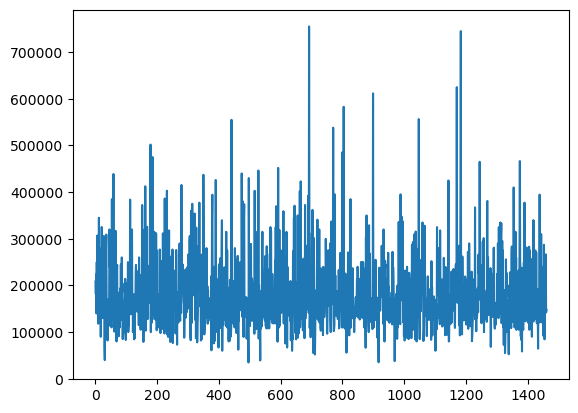

In [16]:
plt.plot(train['SalePrice'])

What is the problem with this plot?
* The code plt.plot() creates a line plot.
* There are so many lines gathered together, which is hard to interpret.
* Obviously, line plot is not suitable for our case.
* We want SalePrice as our x-axis and frequency as y-axis.
* A histogram is more suitable here.

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

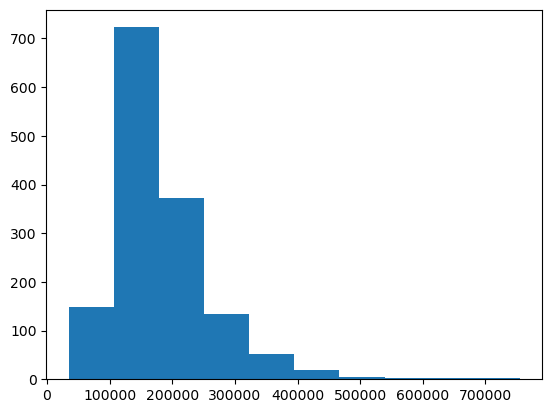

In [23]:
plt.hist(train['SalePrice'])

What is the problem of this plot?
* Now x-axis and y-axis are correctly set. And don't forget to set x and y lables.
* We still need to adjust the binwide of this histogram to make it look proper.  

Text(0.5, 1.0, 'Distribution of House Prices')

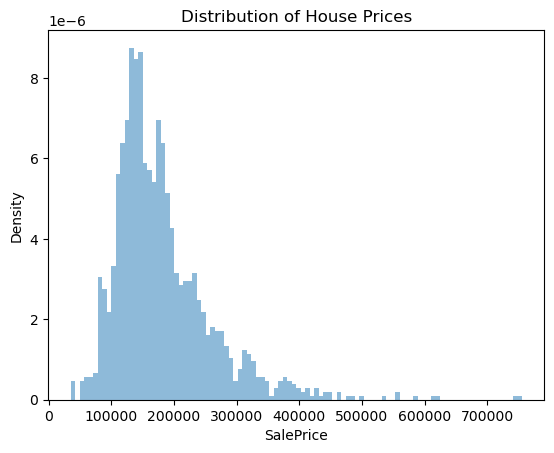

In [38]:
# the number of bins is 100
# density instead of frequency
# alpha to adjust visibility

plt.hist(train['SalePrice'],bins = 100, density = True, alpha = 0.5) 
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Distribution of House Prices')

* Can we add a density line?  And how?
* KDE: kernel density estimation: 
  * non-parametric method for estimating the pdf of a continuous random variable
  * estimate the distribution of data points in a smooth manner, without assuming any underlying parametric distritution such as normal distribution.

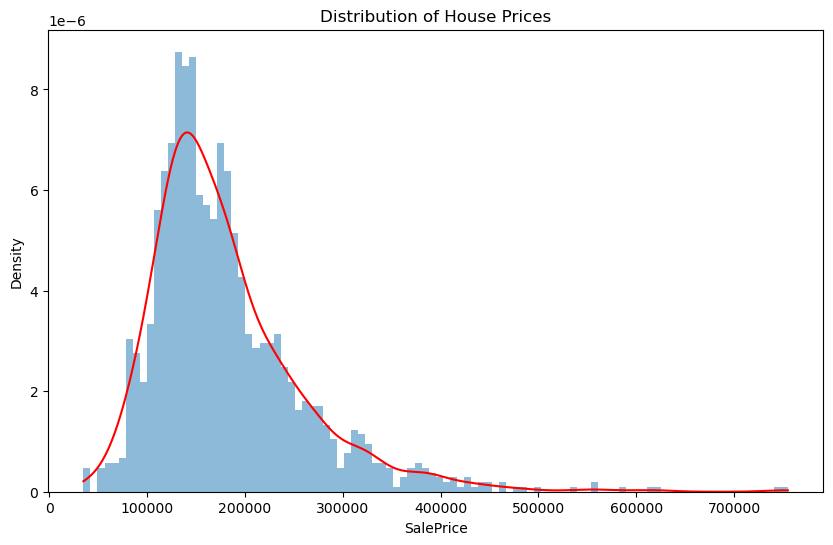

In [15]:
plt.figure(figsize = (10,6))
plt.hist(train['SalePrice'],bins = 100, density = True, alpha = 0.5) 
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Distribution of House Prices')

kde = gaussian_kde(train['SalePrice'])                                    # values of kde,  y-axis
x = np.linspace(train['SalePrice'].min(),train['SalePrice'].max(),1000)   # range of kde in x-axis

plt.plot(x,kde(x),color = 'red')

plt.savefig('Density of House Price.png')

plt.show()



Now I've made a perfect plot of distribution of House Price
* Is there a simpler way to do all these process?
* Yes!  use seaborn packages

<Figure size 1000x600 with 0 Axes>

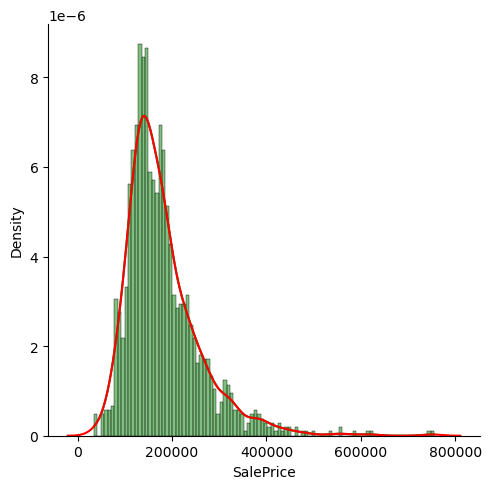

In [17]:
plt.figure(figsize = (10,6))
sns.displot(train['SalePrice'],bins = 100, kde = True, stat = 'density', color = 'green',alpha=0.5)
sns.kdeplot(train['SalePrice'],color = 'red')
plt.savefig('distritbuion of House Price using sns.png')

* If you are familiar with sns(seaborn), and next time when you want to draw a distribution plot of data whose distribution is unkonwn, you can use this simpler code.
* Anyway, a step-by-step plt process is enough and also good.

### 4. Feature engineering  

Let's select all numeric variables

In [80]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

* Now we've got types of each column, it's clearly to find that data types have duplications
* How to remove duplications and show the unique value?
* use set() or unique()


In [90]:
set(train.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [93]:
train.dtypes.nunique()

3

In [94]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

int64 and float64 are numeric variables, then select all data with numeric types

In [18]:
train_num = train.select_dtypes(['int64','float64'])
train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Let's plot the distribution for all the numeric variables

* At first, I thought of using  plt.subplots()  to do it, but then I found it was very troublesome.
* The original notebook gives a very simple and straightforward way.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

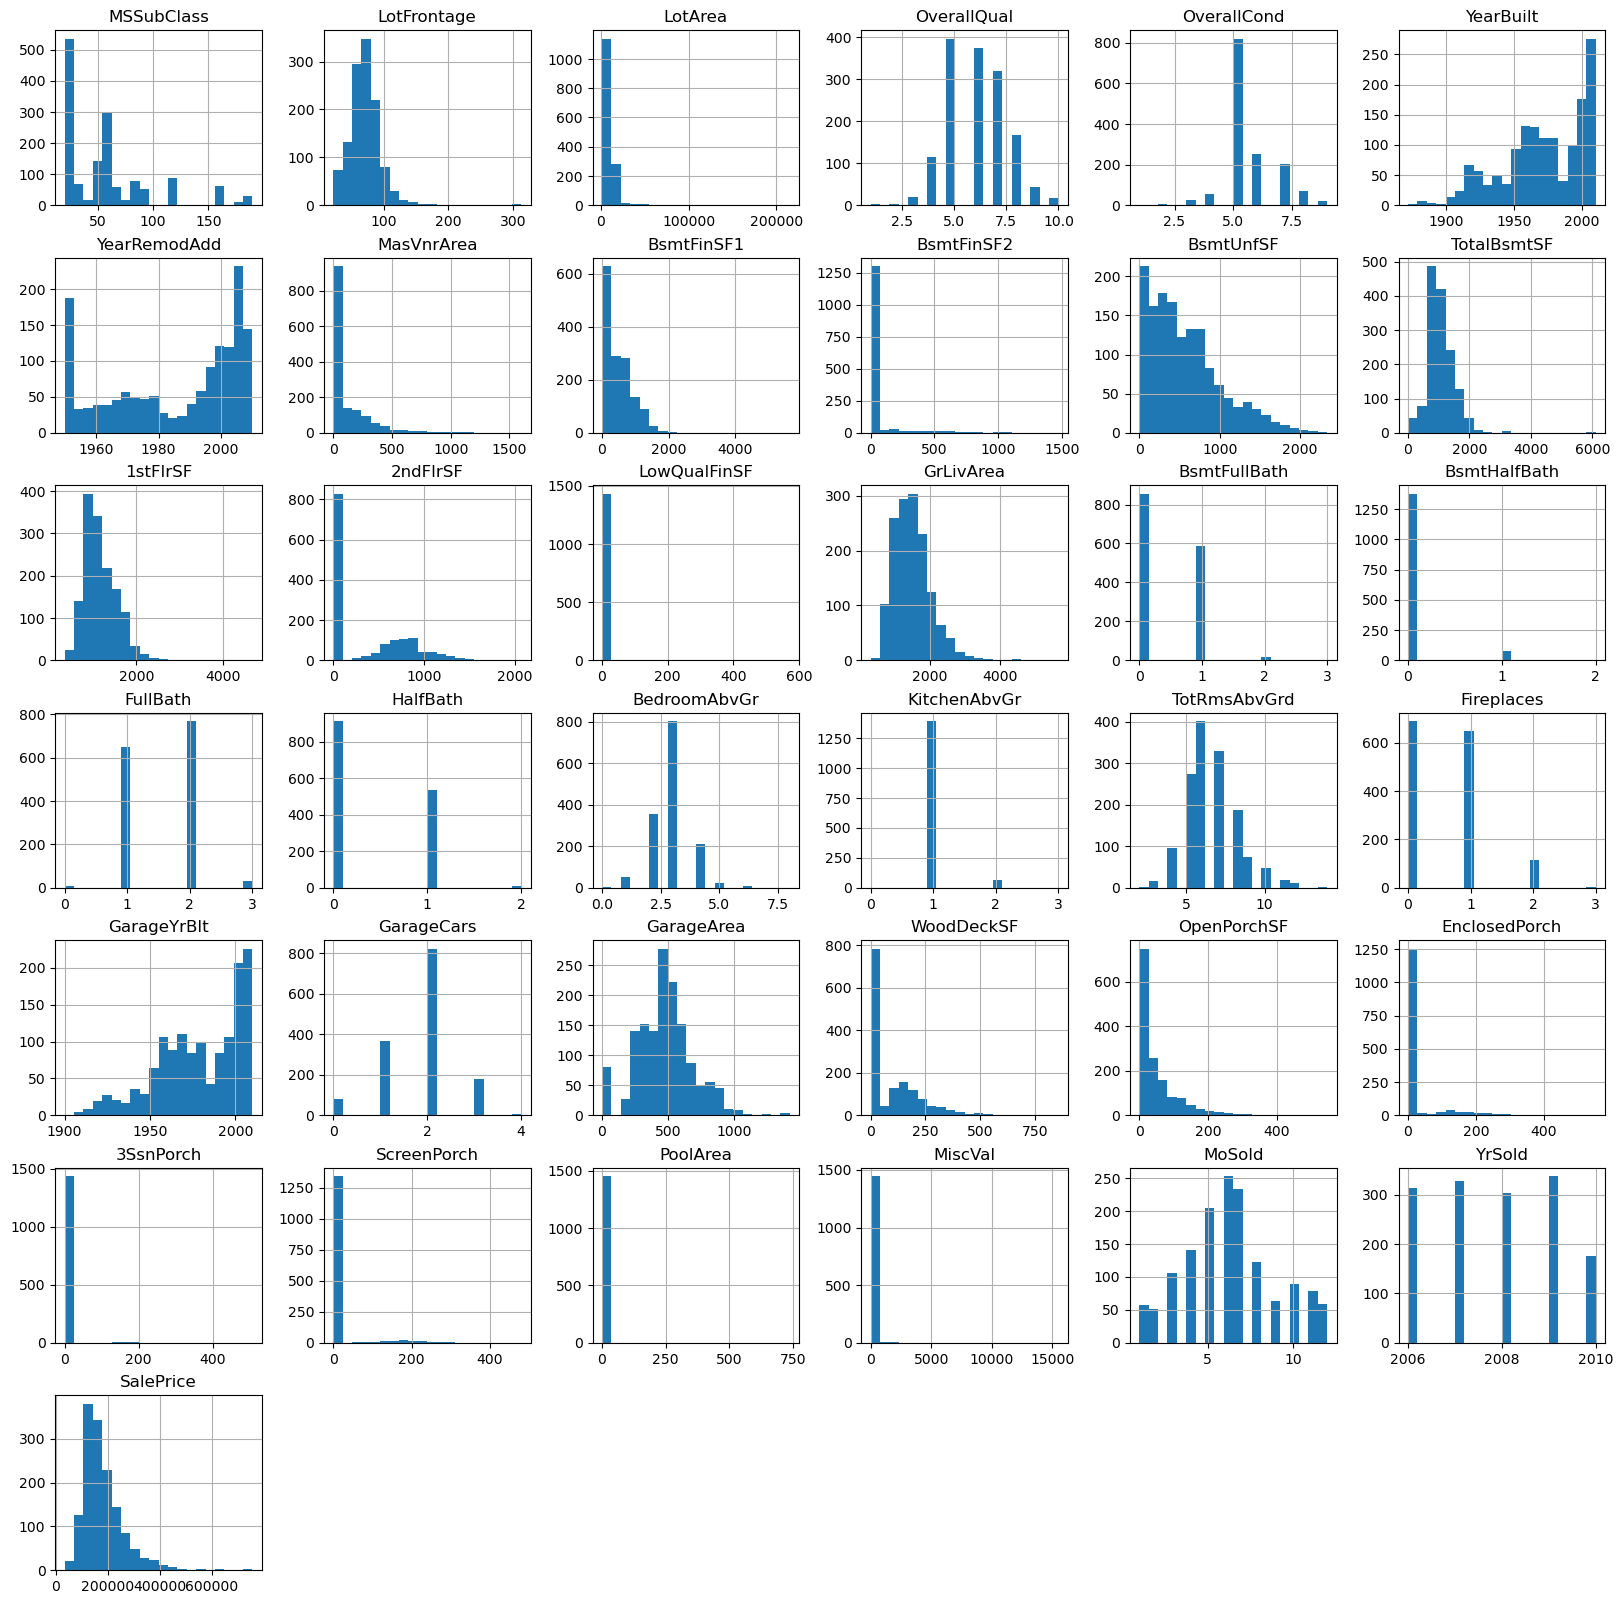

In [19]:
train_num.hist(figsize = (20,20),bins = 20)

Now let's select all nominal features

In [20]:
train.select_dtypes('object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


Before we bulid our predictive model, we need to preprocess our dataset, this step is also called data cleaning.

   1. feature selection

In [21]:
print(train.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


The outcome of all columns needed to be shown.

In [22]:
train.isnull().sum().to_dict()

{'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 872,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces'

In [23]:
train.shape

(1460, 80)

There are 1460 samles in total, and we can see from above that some features have more than half of their values being missing values.

We select these features and drop them. 

"Alley,MasVnrType,FireplaceQu,PoolQC,Fence,MiscFeature"

In [5]:
missing_cols = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']
train = train.drop(missing_cols, axis =1)
test = test.drop(missing_cols,axis =1)

For remaining columns with missing values:
* numeric features: replace NaN with it's column mean
* nominal features: repalce NaN with it's most frequency value

In [6]:
cols_with_missing_train = train.columns[train.isnull().sum() > 0]
cols_with_missing_train

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [7]:
cols_with_missing_test = test.columns[test.isnull().sum() > 0]
cols_with_missing_test

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [27]:
# one example of nominal features
train['BsmtQual'].head()

Id
1    Gd
2    Gd
3    Gd
4    TA
5    Gd
Name: BsmtQual, dtype: object

In [28]:
# one example of numeric features
train['LotFrontage'].head()

Id
1    65.0
2    80.0
3    68.0
4    60.0
5    84.0
Name: LotFrontage, dtype: float64

In [8]:
numeric_cols_train = train[cols_with_missing_train].select_dtypes(['int64','float64']).columns
numeric_cols_train

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [9]:
nominal_cols_train = train[cols_with_missing_train].select_dtypes(['object']).columns
nominal_cols_train

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [10]:
numeric_cols_train = numeric_cols_train.to_list()
nominal_cols_train = nominal_cols_train.to_list()

In [11]:
for i in numeric_cols_train:
    train[i] = train[i].fillna(train[i].mean())

for i in nominal_cols_train:
    train[i] = train[i].fillna(train[i].mode()[0])

In [12]:
numeric_cols_test = test[cols_with_missing_test].select_dtypes(['int64','float64']).columns
numeric_cols_test = numeric_cols_test.to_list()

In [35]:
numeric_cols_test

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [13]:
nominal_cols_test = test[cols_with_missing_test].select_dtypes(['object']).columns
nominal_cols_test = nominal_cols_test.to_list()
nominal_cols_test

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [14]:
for i in numeric_cols_test:
    test[i] = test[i].fillna(test[i].mean())

for i in nominal_cols_test:
    test[i] = test[i].fillna(test[i].mode()[0])

Up to now, we should have already removed all the features that we considered irrelevant, and filled the numerical columns and categorical columns with missing values respectively with their means and modes.

Let's check it out.

In [15]:
train.isnull().sum().sum()
print(train.shape)

(1460, 74)


In [16]:
test.isnull().sum().sum()
print(test.shape)

(1459, 73)


As we know, Random forest algorithm is suitable for mixed data types of features(including both numeric and nominal). But we can not build the model and perform prediction using nominal data directly. 

Encoding of nominal data is the next step that must be done!
* Label encoding : for sequential data
* One-hot encoding: for all data

One-Hot Encoding is recommended because it doesn't make assumptions about the magnitude relationships among categorical variables.

In [17]:
for i in train.columns:
    if train[i].dtype == 'object':
        dummies = pd.get_dummies(train[i],prefix = i)
        train = pd.concat([train,dummies],axis = 1)
        train.drop(i,axis=1,inplace=True)

In [18]:
for i in test.columns:
    if test[i].dtype == 'object':
        dummies = pd.get_dummies(test[i],prefix = i)
        test = pd.concat([test,dummies],axis = 1)
        test.drop(i,axis=1,inplace=True)

In [44]:
X = train.drop('SalePrice',axis = 1)
y = train['SalePrice']

In [20]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [45]:
test = test.reindex(columns = X.columns,fill_value = 0)

In [46]:
test.shape

(1459, 266)

Since we've already cleaned our data and finished the encoding part of categorical features. It's time to build our model.

Here I choose Random Forest as our predictive model and there are some reasons:
* Our dataset contains both numeric and categorical features, tree-based model especially random forest is suitable for it.
* CART model usually causes large variance, to reduce variance, ensemble model is a good choice and Random Forest is a classic algorithm of ensemble.
* The OOB and bagging algorithm is very popular and useful: bootstrap sampling both for data points and features of each tree | splitting is no need
   

In [47]:
rf = RandomForestRegressor(oob_score = True)
rf.fit(X,y)
print('R squared for full data:',rf.score(X,y))
print('OOB R squared:', rf.oob_score_)

R squared for full data: 0.9808709447707353
OOB R squared: 0.8528962170231664


In [48]:
y_oob_pred = rf.oob_prediction_
mse_oob = mean_squared_error(y,y_oob_pred)
rmse_oob = sqrt(mse_oob)
print('OOB RMSE:',rmse_oob)

OOB RMSE: 30459.029192342863


Now we can predict our new data by this fitted rf model.

In [52]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = rf.predict(test)
submission = sample_submission
submission.to_csv('submission.csv',index = False)


In [53]:
submission.head()

,Id,SalePrice
0,1461,125319.83
1,1462,153551.55
2,1463,181446.43
3,1464,181188.32
4,1465,197342.50


In [32]:
submission.shape

(1459, 2)

In [43]:
price = submission['SalePrice']
price.to_csv('ID.csv',index = False)